In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np


warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("train.xlsx")
df.sample(5)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
32695,-58,-65,-63,-66,-65,-64,-80,-79,-67,-55,-57,-58,-67,-71,-70,-77,-71,-75,A4
11223,-56,-63,-70,-78,-66,-66,-75,-76,-73,-54,-54,-56,-67,-72,-65,-67,-76,-74,A1
33062,-65,-57,-51,-49,-71,-70,-77,-68,-65,-60,-53,-51,-54,-58,-58,-71,-67,-72,A31
22048,-64,-68,-64,-67,-65,-53,-61,-52,-45,-77,-63,-63,-68,-61,-58,-53,-48,-50,A71
33969,-49,-48,-60,-63,-69,-82,-80,-77,-76,-57,-64,-69,-64,-76,-70,-80,-74,-76,B6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1      36752 non-null  int64 
 1   T2      36752 non-null  int64 
 2   T3      36752 non-null  int64 
 3   T4      36752 non-null  int64 
 4   T5      36752 non-null  int64 
 5   T6      36752 non-null  int64 
 6   T7      36752 non-null  int64 
 7   T8      36752 non-null  int64 
 8   T9      36752 non-null  int64 
 9   T10     36752 non-null  int64 
 10  T11     36752 non-null  int64 
 11  T12     36752 non-null  int64 
 12  T13     36752 non-null  int64 
 13  T14     36752 non-null  int64 
 14  T15     36752 non-null  int64 
 15  T16     36752 non-null  int64 
 16  T17     36752 non-null  int64 
 17  T18     36752 non-null  int64 
 18  target  36752 non-null  object
dtypes: int64(18), object(1)
memory usage: 5.3+ MB


In [4]:
df.shape

(36752, 19)

In [5]:
df.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11',
       'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'target'],
      dtype='object')

In [6]:
df.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
count,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000
mean,-65.865449,-64.521931,-64.574472,-65.296474,-64.462152,-63.318731,-67.030202,-66.591260,-65.692479,-65.555181,-65.681922,-66.244204,-63.962614,-64.399080,-64.550011,-64.136782,-65.910726,-66.590417
std,8.737286,8.914559,8.154517,8.142803,8.068375,8.651501,9.257529,10.160193,10.598247,10.408147,9.453958,8.866239,8.254217,9.562839,9.207343,10.540542,10.071973,10.600992
min,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000
25%,-72.000000,-70.000000,-70.000000,-70.000000,-69.000000,-69.000000,-74.000000,-75.000000,-73.000000,-73.000000,-71.000000,-72.000000,-69.000000,-70.000000,-70.000000,-71.000000,-72.000000,-74.000000
50%,-66.000000,-65.000000,-64.000000,-66.000000,-65.000000,-63.000000,-66.000000,-66.000000,-65.000000,-65.000000,-65.000000,-66.000000,-63.000000,-64.000000,-65.000000,-63.000000,-65.000000,-66.000000
75%,-61.000000,-59.000000,-59.000000,-61.000000,-59.000000,-57.000000,-60.000000,-59.000000,-58.000000,-58.000000,-59.000000,-61.000000,-58.000000,-58.000000,-58.000000,-57.000000,-59.000000,-59.000000
max,-41.000000,-37.000000,-41.000000,-39.000000,-36.000000,-39.000000,-45.000000,-39.000000,-39.000000,-37.000000,-40.000000,-43.000000,-43.000000,-39.000000,-38.000000,-40.000000,-43.000000,-39.000000


In [7]:
df.isna().sum()

T1        0
T2        0
T3        0
T4        0
T5        0
T6        0
T7        0
T8        0
T9        0
T10       0
T11       0
T12       0
T13       0
T14       0
T15       0
T16       0
T17       0
T18       0
target    0
dtype: int64

In [8]:
# Separate features and target
X = df.drop(columns='target')
y = df['target']

In [9]:
#standardising the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

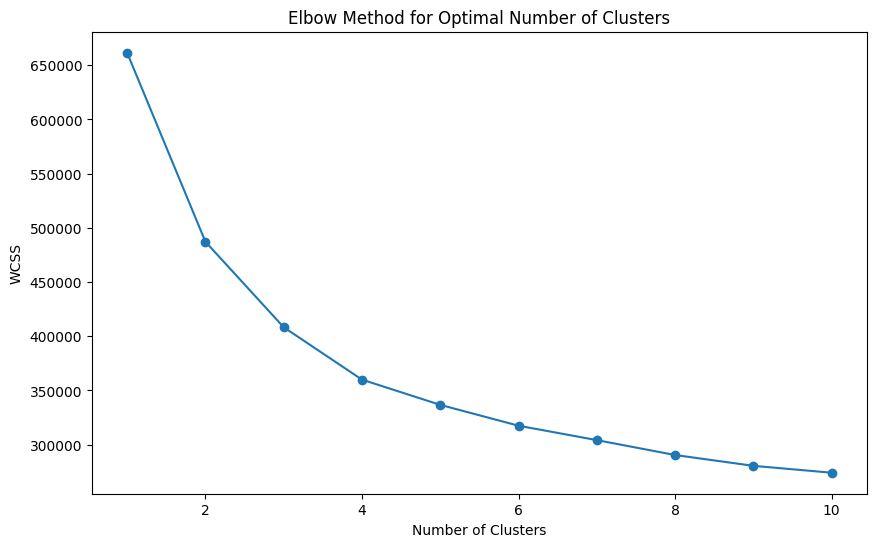

In [10]:
# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [11]:
# Fit K-Means with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster assignments to the original DataFrame
df['Cluster'] = cluster_labels

In [12]:
def identify_cluster(data_point):
    # Standardize the data point
    data_point_scaled = scaler.transform(data_point.reshape(1, -1))
    
    # Predict cluster label for the data point
    cluster_label = kmeans.predict(data_point_scaled)[0]
    
    return cluster_label


In [13]:
def explain_cluster(data_point):
    # Get cluster label for the data point
    cluster_label = identify_cluster(data_point)
    
    # Get centroid of the cluster
    centroid = kmeans.cluster_centers_[cluster_label]
    
    # Compare data point with centroid
    similarity = pd.Series(data_point).corr(pd.Series(centroid))
    
    return f"The data point belongs to Cluster {cluster_label}. Similarity with centroid: {similarity:.2f}"


In [14]:
test_df = pd.read_excel("test.xlsx")

In [17]:
# Example data point
import random

random_row_label = random.randint(0, len(test_df))


example_data_point = np.array(test_df.iloc[random_row_label].to_list())

# Identify cluster for the example data point
cluster_label = identify_cluster(example_data_point)

# Explain why the data point belongs to the cluster
explanation = explain_cluster(example_data_point)

print("For row label ", random_row_label)
print(f"Data point belongs to Cluster {cluster_label}.")
print(explanation)


For row label  11709
Data point belongs to Cluster 0.
The data point belongs to Cluster 0. Similarity with centroid: 0.08


In [24]:
import joblib

joblib.dump(kmeans, 'kmeans.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']